In [1]:
import pandas as pd 
import numpy as np 
import mne 
import os

In [2]:
# Define folder and file paths
folder_path = 'dataset'
file_kanan = os.path.join(folder_path, 'thumb_kanan.csv')
file_kiri = os.path.join(folder_path, 'thumb_kiri.csv')

# Read both files and concatenate them
d1 = pd.read_csv(file_kanan, delimiter=';', skiprows=1)
d2 = pd.read_csv(file_kiri, delimiter=';', skiprows=1)


In [3]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10068 entries, 0 to 10067
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CH1        10068 non-null  object
 1   CH2        10068 non-null  object
 2   CH3        10068 non-null  object
 3   CH4        10068 non-null  object
 4   Vbat       10068 non-null  int64 
 5   Trigger    10068 non-null  int64 
 6   AccX       10068 non-null  int64 
 7   AccY       10068 non-null  int64 
 8   AccZ       10068 non-null  int64 
 9   GyX        10068 non-null  int64 
 10  GyY        10068 non-null  int64 
 11  GyZ        10068 non-null  int64 
 12  N          10068 non-null  int64 
 13  fs         10068 non-null  int64 
 14  Timestamp  10068 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.2+ MB


In [4]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CH1        10050 non-null  object
 1   CH2        10050 non-null  object
 2   CH3        10050 non-null  object
 3   CH4        10050 non-null  object
 4   Vbat       10050 non-null  int64 
 5   Trigger    10050 non-null  int64 
 6   AccX       10050 non-null  int64 
 7   AccY       10050 non-null  int64 
 8   AccZ       10050 non-null  int64 
 9   GyX        10050 non-null  int64 
 10  GyY        10050 non-null  int64 
 11  GyZ        10050 non-null  int64 
 12  N          10050 non-null  int64 
 13  fs         10050 non-null  int64 
 14  Timestamp  10050 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.2+ MB


In [5]:

# Concatenate both datasets vertically
df = pd.concat([d1, d2], ignore_index=True)
df

,CH1,CH2,CH3,CH4,Vbat,Trigger,AccX,AccY,AccZ,GyX,GyY,GyZ,N,fs,Timestamp
0,"-856,739372629854","-1379,61575302902","-1243,65004386322","-1226,05357315439",3922,0,-6555,1565,-15087,45,189,-10,1969067,500,17:36:01.908436
1,"-1711,06269993862","-2317,77190040424","-2101,12386773204","-2114,70680966779",3922,0,-6555,1565,-15087,45,189,-10,1969068,500,17:36:01.908448
2,"-1275,28132504213","-1615,3486961607","-1490,52077175389","-1763,32371438978",3922,0,-6555,1565,-15087,45,189,-10,1969069,500,17:36:01.908455
3,"-539,27766213541","-771,592669160456","-751,738382140053","-1012,64251178863",3922,0,-6555,1565,-15087,45,189,-10,1969070,500,17:36:01.908462
4,"91,3313118594994","-30,3061111223851","-97,4887140427362","-319,857505784168",3922,0,-6619,1570,-15098,69,176,-82,1969071,500,17:36:01.908469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20113,"-1627,86670965829","-1944,4941650368","-1820,78075918231","-1576,99116271162",3928,0,-8808,900,-13980,85,208,-63,1935084,500,17:34:53.689948
20114,"-1606,25095320525","-1854,32788436593","-1807,80259509801","-1715,3961064352",3928,0,-8808,900,-13980,85,208,-63,1935085,500,17:34:53.689977
20115,"-2647,96627135124","-3011,52704483012","-2850,81786128881","-2613,38645601459",3928,0,-8808,900,-13980,85,208,-63,1935086,500,17:34:53.690008
20116,"-2875,31057904614","-3191,69909022771","-3034,99739806758","-2860,32843835436",3928,0,-8808,900,-13980,85,208,-63,1935087,500,17:34:53.690036


In [6]:
column = ["CH1","CH2", 	"CH3",	"CH4"]

df = df[column]

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.', regex=False) 

# Drop any rows with NaN values
df = df.dropna()
# df = df.drop("label", axis=1)
df.head()

C:\Users\Dhiyaa Amalia\AppData\Local\Temp\ipykernel_18700\3194278416.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace(',', '.', regex=False)


,CH1,CH2,CH3,CH4
0,-856.739372629854,-1379.61575302902,-1243.65004386322,-1226.05357315439
1,-1711.06269993862,-2317.77190040424,-2101.12386773204,-2114.70680966779
2,-1275.28132504213,-1615.3486961607,-1490.52077175389,-1763.32371438978
3,-539.27766213541,-771.592669160456,-751.738382140053,-1012.64251178863
4,91.3313118594994,-30.3061111223851,-97.4887140427362,-319.857505784168


In [7]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20118 entries, 0 to 20117
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CH1     20118 non-null  float64
 1   CH2     20118 non-null  float64
 2   CH3     20118 non-null  float64
 3   CH4     20118 non-null  float64
dtypes: float64(4)
memory usage: 628.8 KB


In [8]:
df.describe()

,CH1,CH2,CH3,CH4
count,20118.000000,20118.000000,20118.000000,20118.000000
mean,6.777985,11.005409,4.462468,2.859589
std,2015.614466,2050.353669,2005.255882,1974.183012
min,-8753.482591,-9039.247134,-8975.087625,-8491.883136
25%,-1117.558523,-1165.593716,-1098.962327,-1102.599508
50%,30.733196,33.558431,33.622038,20.843311
75%,1117.125443,1181.034583,1118.601662,1092.979463
max,9128.242726,9114.364002,9039.263104,9749.278410


In [9]:
# scaler
from sklearn.preprocessing import StandardScaler # type: ignore
scaler = [StandardScaler() for _ in df.columns]
for i, col in enumerate(df.columns):
    df[col] = scaler[i].fit_transform(df[col].to_numpy().reshape(-1, 1))

df.head()

,CH1,CH2,CH3,CH4
0,-0.428425,-0.678252,-0.622436,-0.622507
1,-0.852288,-1.135821,-1.050060,-1.072656
2,-0.636080,-0.793226,-0.745551,-0.894662
3,-0.270919,-0.381699,-0.377119,-0.514404
4,0.041950,-0.020149,-0.050843,-0.163473


In [10]:
df.describe()

,CH1,CH2,CH3,CH4
count,2.011800e+04,2.011800e+04,2.011800e+04,20118.000000
mean,-8.476501e-18,2.542950e-17,-5.651001e-18,0.000000
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025
min,-4.346307e+00,-4.414106e+00,-4.478118e+00,-4.303022
25%,-5.578271e-01,-5.738661e-01,-5.502800e-01,-0.559972
50%,1.188511e-02,1.099985e-02,1.454193e-02,0.009110
75%,5.508866e-01,5.706617e-01,5.556233e-01,0.552202
max,4.525514e+00,4.440007e+00,4.505672e+00,4.937061


Creating RawArray with float64 data, n_channels=4, n_times=20118
    Range : 0 ... 20117 =      0.000 ...    40.234 secs
Ready.
Using matplotlib as 2D backend.


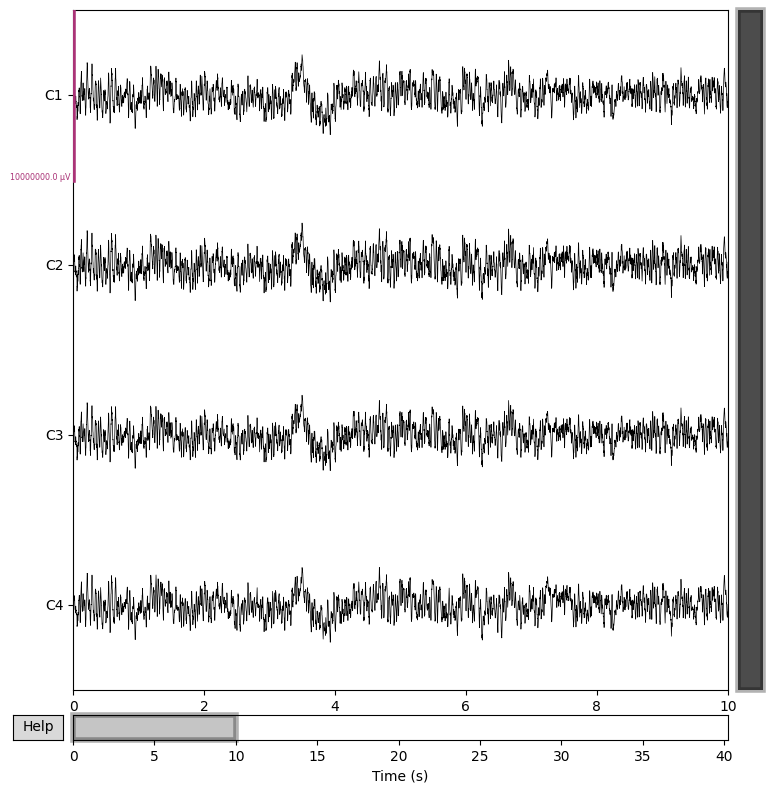

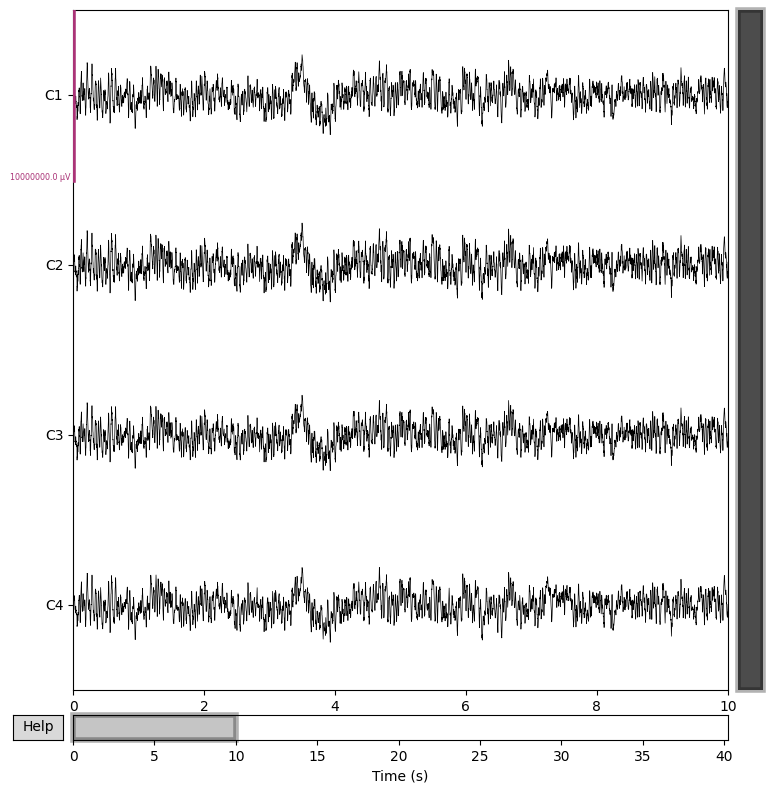

In [11]:
#define info EEG RAW
sfreq = 500
ch_types = ["eeg", "eeg", "eeg", "eeg"]
ch_names = ["C1","C2","C3","C4"]
montage = mne.channels.make_standard_montage("standard_1020")
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
info.set_montage(montage)

# Create RawArray
data = df.T
raw = mne.io.RawArray(data, info)
raw.plot(n_channels=4, scalings=5, show=True, block=True)



In [12]:
raw.info

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,7 points
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [13]:
total_duration = raw.times[-1]  # Mengambil waktu terakhir dari raw data

# add anotations every 1 second of total duration data
onset = [i for i in range(0, int(total_duration), 1)]
duration = [1] * len(onset)
description = ['thumb'] * len(onset)

annotations = mne.Annotations(onset=onset, duration=duration, description=description)
raw.set_annotations(annotations)

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,7 points
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [14]:
events, _ = mne.events_from_annotations(raw)
print(events)

Used Annotations descriptions: ['thumb']
[[    0     0     1]
 [  500     0     1]
 [ 1000     0     1]
 [ 1500     0     1]
 [ 2000     0     1]
 [ 2500     0     1]
 [ 3000     0     1]
 [ 3500     0     1]
 [ 4000     0     1]
 [ 4500     0     1]
 [ 5000     0     1]
 [ 5500     0     1]
 [ 6000     0     1]
 [ 6500     0     1]
 [ 7000     0     1]
 [ 7500     0     1]
 [ 8000     0     1]
 [ 8500     0     1]
 [ 9000     0     1]
 [ 9500     0     1]
 [10000     0     1]
 [10500     0     1]
 [11000     0     1]
 [11500     0     1]
 [12000     0     1]
 [12500     0     1]
 [13000     0     1]
 [13500     0     1]
 [14000     0     1]
 [14500     0     1]
 [15000     0     1]
 [15500     0     1]
 [16000     0     1]
 [16500     0     1]
 [17000     0     1]
 [17500     0     1]
 [18000     0     1]
 [18500     0     1]
 [19000     0     1]
 [19500     0     1]]


In [15]:
# save raw
raw.save("thumb-daniyal.fif", overwrite=True)

Writing c:\Users\Dhiyaa Amalia\capstone\classification\thumb-daniyal.fif
Closing c:\Users\Dhiyaa Amalia\capstone\classification\thumb-daniyal.fif
[done]


C:\Users\Dhiyaa Amalia\AppData\Local\Temp\ipykernel_18700\3248266663.py:2: RuntimeWarning: This filename (c:\Users\Dhiyaa Amalia\capstone\classification\thumb-daniyal.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save("thumb-daniyal.fif", overwrite=True)


Opening raw data file c:\Users\Dhiyaa Amalia\capstone\classification\fist.fif...
    Range : 0 ... 20329 =      0.000 ...    40.658 secs
Ready.
Reading 0 ... 20329  =      0.000 ...    40.658 secs...
Opening raw data file c:\Users\Dhiyaa Amalia\capstone\classification\hook.fif...
    Range : 0 ... 20057 =      0.000 ...    40.114 secs
Ready.
Reading 0 ... 20057  =      0.000 ...    40.114 secs...
Opening raw data file c:\Users\Dhiyaa Amalia\capstone\classification\index.fif...
    Range : 0 ... 20467 =      0.000 ...    40.934 secs
Ready.
Reading 0 ... 20467  =      0.000 ...    40.934 secs...
Opening raw data file c:\Users\Dhiyaa Amalia\capstone\classification\open.fif...
    Range : 0 ... 20029 =      0.000 ...    40.058 secs
Ready.
Reading 0 ... 20029  =      0.000 ...    40.058 secs...
Opening raw data file c:\Users\Dhiyaa Amalia\capstone\classification\thumb.fif...
    Range : 0 ... 20117 =      0.000 ...    40.234 secs
Ready.
Reading 0 ... 20117  =      0.000 ...    40.234 secs..

C:\Users\Dhiyaa Amalia\AppData\Local\Temp\ipykernel_18552\3723227770.py:5: RuntimeWarning: This filename (c:\Users\Dhiyaa Amalia\capstone\classification\fist.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_paths[0], preload=True)
C:\Users\Dhiyaa Amalia\AppData\Local\Temp\ipykernel_18552\3723227770.py:8: RuntimeWarning: This filename (c:\Users\Dhiyaa Amalia\capstone\classification\hook.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data_to_add = mne.io.read_raw_fif(file_path, preload=True)
C:\Users\Dhiyaa Amalia\AppData\Local\Temp\ipykernel_18552\3723227770.py:8: RuntimeWarning: Th

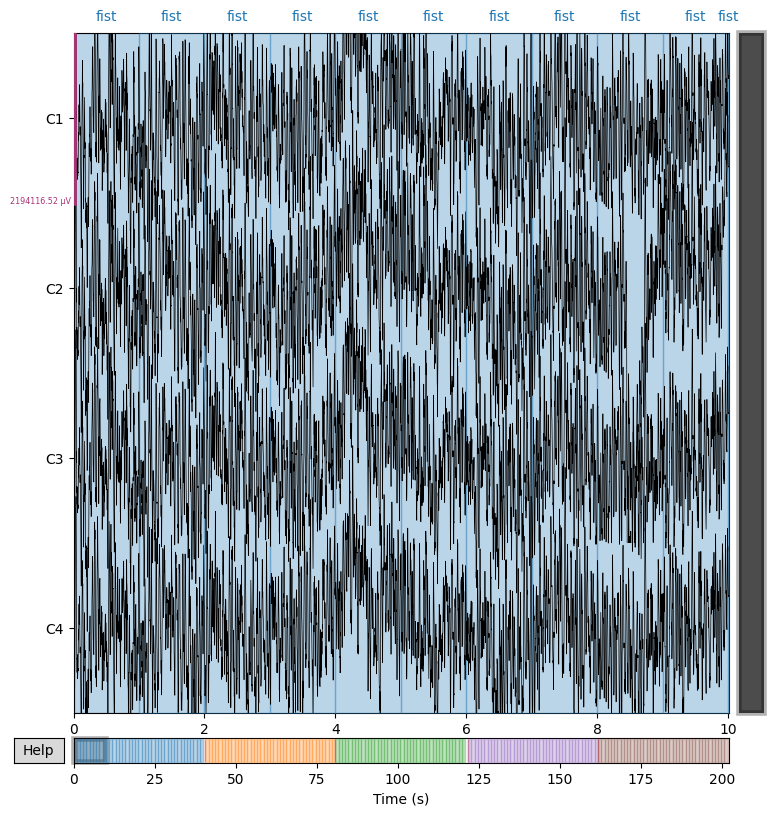

Overwriting existing file.
Writing c:\Users\Dhiyaa Amalia\capstone\classification\data.fif
Closing c:\Users\Dhiyaa Amalia\capstone\classification\data.fif
[done]


C:\Users\Dhiyaa Amalia\AppData\Local\Temp\ipykernel_18552\3723227770.py:14: RuntimeWarning: This filename (c:\Users\Dhiyaa Amalia\capstone\classification\data.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data.save(output_fif_file, overwrite=True)


In [23]:
fif_files = ['fist.fif', 'hook.fif', 'index.fif', 'open.fif', 'thumb.fif']

file_paths = [os.path.join(os.getcwd(), fif_file) for fif_file in fif_files]

raw_data = mne.io.read_raw_fif(file_paths[0], preload=True)

for file_path in file_paths[1:]:
    raw_data_to_add = mne.io.read_raw_fif(file_path, preload=True)
    raw_data.append(raw_data_to_add)

raw_data.plot(n_channels=4, scalings='auto', show=True)

output_fif_file = 'data.fif'
raw_data.save(output_fif_file, overwrite=True)